# Implementing a simple Linear regression from scratch

In [16]:
# Importing important libraries - pandas, matplotlib and numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Reading the Data keeping header=None cause there are no header files in the data file given
data = pd.read_csv("data/data.csv", header=None)
data.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


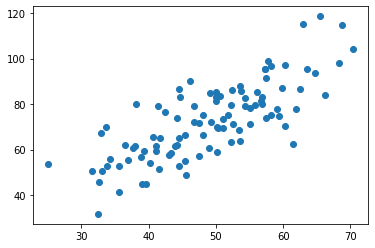

In [21]:
"""
In the dataset, the first column (header 0) are the x values and the second column (header 1) are the y values
Hence we define the x and y values from the respective columns of the data frame!!
"""
x = data[0].values
y = data[1].values

"""
Plotting the x and y points as scatter plots to visualise the dataset
"""
plt.figure()
plt.scatter(x,y)
plt.show()

# Understanding Batch and Stochastic Gradient Descent

**Batch Gradient Descent:** In batch gradient descent, one passes the input to the model in batches and hence the model learns to fit a line to the entire batch after every iteration. Hence improvements to the parameters are made considering the entire batch as a whole and hence in the next iteration, the line wouldn’t shift by much implying not much difference in the cost.

![](data/n1.png)

**Stochastic Gradient Descent**: In stochastic Gradient Descent, the input is passed point by point and hence at every iteration, a line is fit for one particular point only as it doesn’t care about the remaining points. Hence in the next iteration, the model would fit a line for the next point and hence there would be sudden spikes in the cost function initially which would finally diminish to reach the minima.

![](data/n2.png)

![](data/n3.gif)

Now which is better! Well passing the entire data as a whole isnt possible as there might be memory issues. But passing the data one by one as in stochastic gradient doesn't converge steadily. Hence for larger dataset, they are converted into small batches which are passed to the model. Now since this dataset is very small there is no need for us to convert them to tinier batches but rather its enough to pass it as a whole. Lets try them both individually and understand the key differences between them,

In [22]:
"""
Defining the model params!! 
number of iterations
learning rate
initial values of m and c
"""
num_iter = 20
lr = 0.0001
m = 0.0
c = 0.0


"""
Lists for plotting!!
"""
history = []
c_history = []
m_history = []

# The loop starts here!!!

for i in range(num_iter):
    # first find the predicted value of y based on m and c
    y_pred = m*x + c    
    
    # this is compared with the ground truth (y) and the cost is computed ! (mean squared error)
    error = y_pred - y
    cost = 0.5*np.mean(error**2)

    # As per the formulae defined on the markdown file, we calculate partial derivatives of cost with respect to m and c
    # Here since y_pred, y and x are vectors. I am taking a dot product of them and then taking the mean to calculate
    # 1/n*[sum(y_pred-y)]*x and 1/n*[sum(y_pred - y)]
    
    m_deriv = np.mean((y_pred - y)*x)
    c_deriv = np.mean((y_pred - y))
    
    # Once the corresponding derivatives are computed the update steps have to be taken simulataneously!
    # m = m - learning rate*(derivative of cost with respect to m) and similarly for c too!
    m = m - lr*m_deriv
    c = c - lr*c_deriv
    
    c_history.append(c)
    m_history.append(m)
    history.append(cost)

    
    

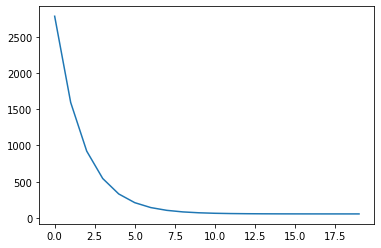

In [23]:
# plotting cost vs iterations - see the smooth curve when applying batch gradient descent
plt.figure()
x_labels = np.arange(0, len(history), 1)
plt.plot(x_labels,history)
plt.show()

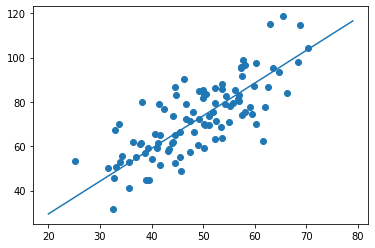

In [25]:
# the plotting line with params identified from last iteration
plt.figure()
plt.scatter(x,y)
x_line = np.arange(20,80,1)
y_line = m*x_line + c
plt.plot(x_line, y_line)


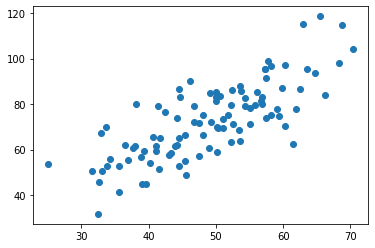

In [26]:
# animating the line as it gets fit to the data
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# initialising the plot element by plotting an empty list
plt.scatter(x,y)
line, = ax.plot([], [], lw=2)
def animate(i):
    x = np.arange(20,90)
    y = m_history[i] * x + c_history[i]
    line.set_data(x, y)
    return (line,)



In [8]:
anim = animation.FuncAnimation(fig, animate,frames=len(m_history), interval=100)
HTML(anim.to_html5_video())

In [27]:
"""
Performing Stochastic Gradient Descent. Here every point is taken one by one and a line is fit to each of them. 
Loss decreases but doesn't saturate quickly and keeps jittering towards the end. 
"""

# model params same as prev here number of updates to the line is (num_iter)*len(dataset)
num_iter = 5
lr = 0.0001
m = 0.0
c = 0.0

history = []
m_history = []
c_history = []

for i in range(num_iter):
    # going through every point one by one.
    for j in range(len(x)):
        
        # finding y_pred based for that one point! and calcuating error and cost.
        y_pred = m*x[j] + c    
        error = y_pred - y[j]
        # here n = 1 hence not dividing by N
        cost = 0.5*(error**2)

        # computing derivative of cost with respect to m and c
        m_deriv = ((y_pred - y[j])*x[j])
        c_deriv = ((y_pred - y[j]))

        # updating m and c simultaneously!
        m = m - lr*m_deriv
        c = c - lr*c_deriv
        
        history.append(cost)
        m_history.append(m)
        c_history.append(c)


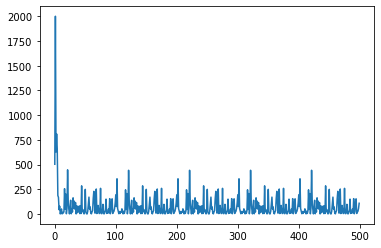

In [28]:
# plotting the cost function - here the cost function fluctuates and is not stable
plt.figure()
x_labels = np.arange(0, len(history), 1)
plt.plot(x_labels,history)
plt.show()

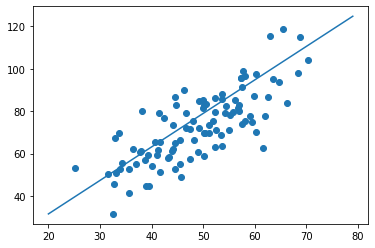

In [29]:
# plotting the line corresponding to the last iteration
plt.figure()
plt.scatter(x,y)
x_line = np.arange(20,80,1)
y_line = m*x_line + c
plt.plot(x_line, y_line)


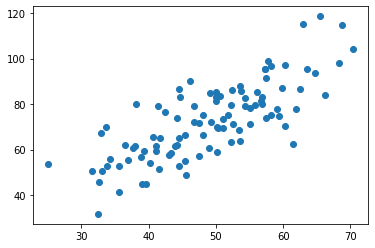

In [30]:
# animating the line 
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

# initialising the plot element by plotting an empty list
plt.scatter(x,y)
line, = ax.plot([], [], lw=2)
def animate(i):
    x = np.arange(20,90)
    y = m_history[i] * x + c_history[i]
    line.set_data(x, y)
    return (line,)



In [31]:
anim = animation.FuncAnimation(fig, animate,frames=len(m_history), interval=100)
HTML(anim.to_html5_video())